In [1]:
!wget https://raw.githubusercontent.com/facebook/prophet/master/examples/example_yosemite_temps.csv

--2018-09-05 17:40:41--  https://raw.githubusercontent.com/facebook/prophet/master/examples/example_yosemite_temps.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 462069 (451K) [text/plain]
Saving to: ‘example_yosemite_temps.csv’

example_yosemite_te 100%[===================>] 451.24K   240KB/s    in 1.9s    

2018-09-05 17:40:44 (240 KB/s) - ‘example_yosemite_temps.csv’ saved [462069/462069]



In [3]:
import pandas as pd
from fbprophet import Prophet

INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


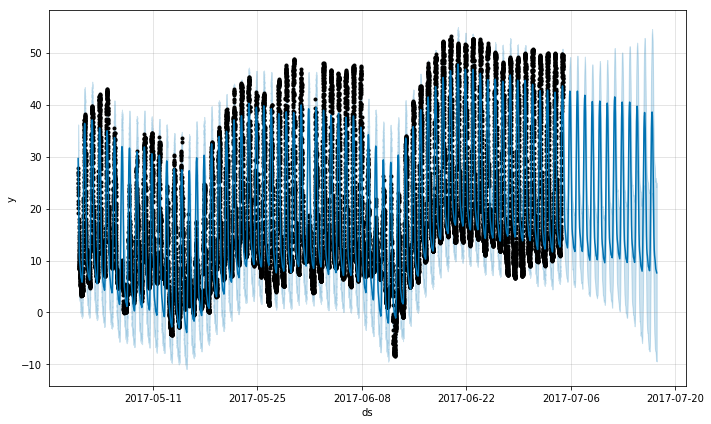

In [4]:
df = pd.read_csv('example_yosemite_temps.csv')
m = Prophet(changepoint_prior_scale=0.01).fit(df)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

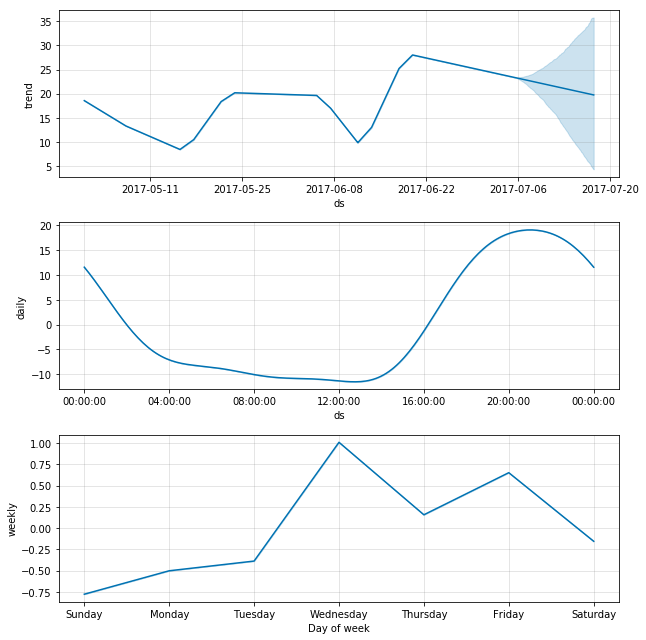

In [5]:
fig = m.plot_components(fcst)


# Data with regular gaps


INFO:fbprophet.forecaster:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


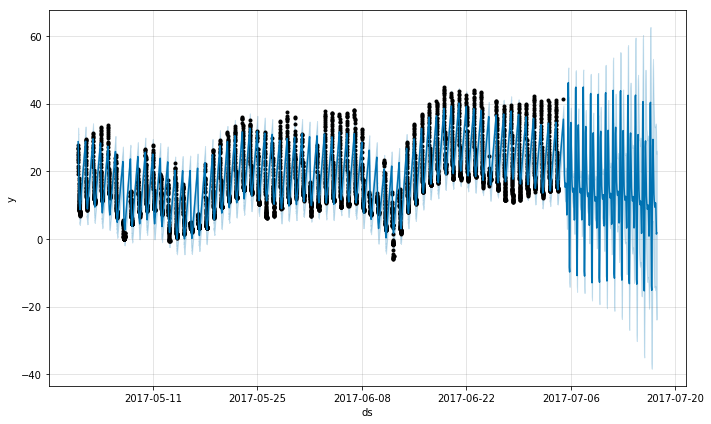

In [6]:
df2 = df.copy()
df2['ds'] = pd.to_datetime(df2['ds'])
df2 = df2[df2['ds'].dt.hour < 6]
m = Prophet().fit(df2)
future = m.make_future_dataframe(periods=300, freq='H')
fcst = m.predict(future)
fig = m.plot(fcst)

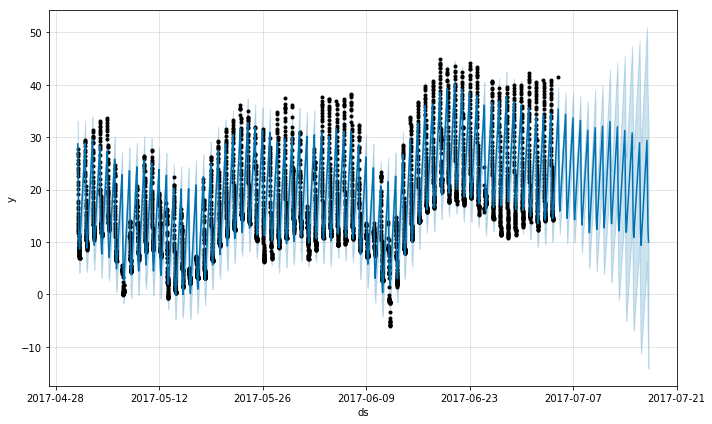

In [7]:
future2 = future.copy()
future2 = future2[future2['ds'].dt.hour < 6]
fcst = m.predict(future2)
fig = m.plot(fcst)

# Monthly data

In [9]:
!wget https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv

--2018-09-05 17:47:11--  https://raw.githubusercontent.com/facebook/prophet/master/examples/example_retail_sales.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5279 (5.2K) [text/plain]
Saving to: ‘example_retail_sales.csv’

example_retail_sale 100%[===================>]   5.16K  --.-KB/s    in 0s      

2018-09-05 17:47:12 (32.9 MB/s) - ‘example_retail_sales.csv’ saved [5279/5279]



INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


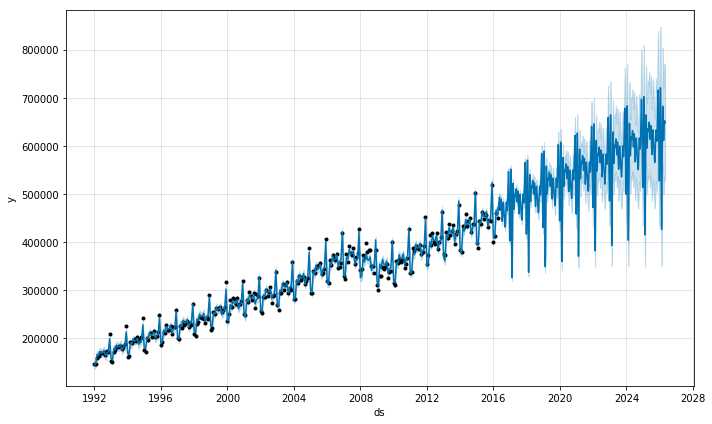

In [10]:
df = pd.read_csv('example_retail_sales.csv')
m = Prophet(seasonality_mode='multiplicative').fit(df)
future = m.make_future_dataframe(periods=3652)
fcst = m.predict(future)
fig = m.plot(fcst)

INFO:fbprophet.forecaster:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
/usr/local/lib/python3.5/dist-packages/pystan/misc.py:455: DeprecationWarning: inspect.getargspec() is deprecated, use inspect.signature() instead
  if "chain_id" in inspect.getargspec(init).args:


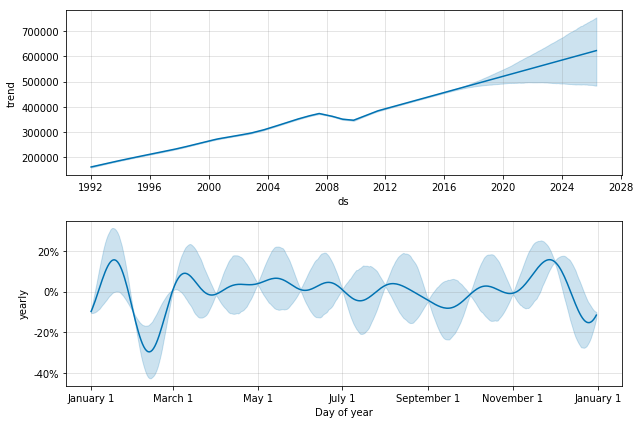

In [11]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=300).fit(df)
fcst = m.predict(future)
fig = m.plot_components(fcst)

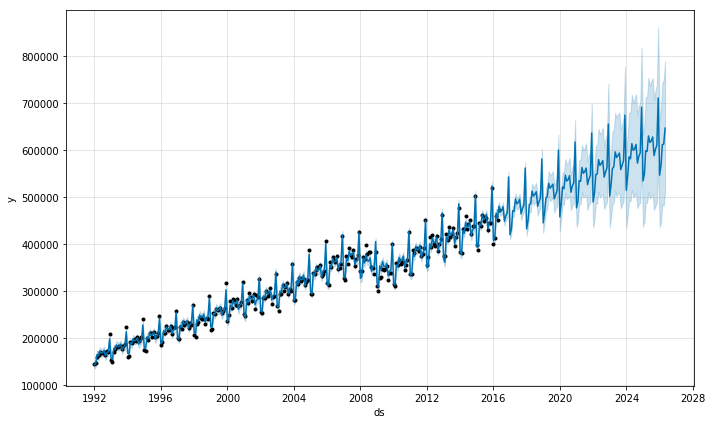

In [12]:
future = m.make_future_dataframe(periods=120, freq='M')
fcst = m.predict(future)
fig = m.plot(fcst)